In [1]:
from source.util import utils as u
from source import metrics, plots
from source import scargc, hs
import sys
import time
import os
import psutil
import resource
import numpy as np
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

Apenas para refazer plots

In [2]:
# HANDSHAKE


# Tempo de Execução:  1657.7314321994781
# memory peak:  155100
# Acc:  0.7527479462013812
# Macro-F1:  0.7500327644486555
# MCC:  0.5409196864166818
# Desvio Padrão:  0.17183741220501747
# Numero de atualizações:  10760

tempo = 1657.73
step = 100


In [3]:
base = '/home/localuser/Documentos/procopio/ccomp/Handshake-TCC/datasets/1CSurr.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)

In [4]:
acc_percent = [0.95428571 ,0.95038168 ,0.92938931 ,0.9370229  ,0.90839695 ,0.90095238
  ,0.90839695 ,0.79389313 ,0.78244275 ,0.70992366 ,0.70857143 ,0.75
  ,0.74236641 ,0.83015267 ,0.8110687  ,0.78095238 ,0.76717557 ,0.86450382
  ,0.92938931 ,0.90648855 ,0.8778626  ,0.87428571 ,0.84351145 ,0.86259542
  ,0.89885496 ,0.92557252 ,0.84380952 ,0.80534351 ,0.77099237 ,0.69656489
  ,0.66030534 ,0.65904762 ,0.63740458 ,0.67748092 ,0.71374046 ,0.77671756
  ,0.82285714 ,0.7480916  ,0.75954198 ,0.80916031 ,0.83969466 ,0.84351145
  ,0.86095238 ,0.84351145 ,0.86068702 ,0.82824427 ,0.84351145 ,0.85904762
  ,0.83206107 ,0.80916031 ,0.8148855  ,0.79580153 ,0.81142857 ,0.77480916
  ,0.77862595 ,0.73664122 ,0.7480916  ,0.73142857 ,0.71183206 ,0.6851145
  ,0.78625954 ,0.73664122 ,0.6870229  ,0.69904762 ,0.75954198 ,0.77671756
  ,0.82824427 ,0.84351145 ,0.86095238 ,0.82442748 ,0.77862595 ,0.77480916
  ,0.73854962 ,0.66857143 ,0.66793893 ,0.77671756 ,0.8778626  ,0.85496183
  ,0.87238095 ,0.79770992 ,0.78816794 ,0.84732824 ,0.91984733 ,0.94083969
  ,0.91238095 ,0.8740458  ,0.87022901 ,0.77671756 ,0.71183206 ,0.52
  ,0.35305344 ,0.25763359 ,0.23664122 ,0.19656489 ,0.32380952 ,0.3129771
  ,0.26335878 ,0.33396947 ,0.34351145 ,0.34285714]
f1_per = [0.95214657 ,0.94800635 ,0.92594545 ,0.93449181 ,0.90692029 ,0.89745169
  ,0.90632123 ,0.79096671 ,0.78243958 ,0.70991944 ,0.70846566 ,0.74999181
  ,0.74229039 ,0.82826062 ,0.80896406 ,0.77878214 ,0.76567013 ,0.86118687
  ,0.92527183 ,0.90331048 ,0.87645152 ,0.87003001 ,0.8418317  ,0.85948185
  ,0.89511094 ,0.92304303 ,0.84122359 ,0.80275744 ,0.77099237 ,0.69655494
  ,0.65918824 ,0.65566959 ,0.63636629 ,0.67705632 ,0.71373629 ,0.77571694
  ,0.8206684  ,0.74714862 ,0.75813258 ,0.80548791 ,0.83546651 ,0.83896984
  ,0.85504314 ,0.84014881 ,0.85991101 ,0.82666608 ,0.84032702 ,0.85711869
  ,0.82951789 ,0.80726224 ,0.81423533 ,0.79508433 ,0.81053771 ,0.77335308
  ,0.77836442 ,0.73617617 ,0.74661509 ,0.73111249 ,0.71178063 ,0.68492057
  ,0.78555664 ,0.7358871  ,0.68679933 ,0.69903779 ,0.75951045 ,0.77620815
  ,0.82733623 ,0.84195504 ,0.85747543 ,0.82329223 ,0.77789795 ,0.77425338
  ,0.73854867 ,0.66781818 ,0.66536005 ,0.77593334 ,0.87431792 ,0.85217081
  ,0.86716841 ,0.79585116 ,0.78721863 ,0.8428974  ,0.91656051 ,0.93908233
  ,0.90858367 ,0.86985776 ,0.87013631 ,0.7764823  ,0.7112758  ,0.51644737
  ,0.34163779 ,0.22142647 ,0.19586268 ,0.16427432 ,0.24460432 ,0.23837209
  ,0.20845921 ,0.25035765 ,0.25568182 ,0.25531915]
mcc_per = [ 0.9079568   ,0.90038006  ,0.86099343  ,0.876071    ,0.82836871  ,0.81391824
   ,0.82865979  ,0.65403112  ,0.64262874  ,0.55029031  ,0.54853396  ,0.59998881
   ,0.59018535  ,0.70678042  ,0.67909802  ,0.6375596   ,0.62019755  ,0.75611385
   ,0.86089563  ,0.82362031  ,0.78003984  ,0.76984391  ,0.72680046  ,0.75349245
   ,0.81006823  ,0.85705842  ,0.72585886  ,0.67035913  ,0.62732919  ,0.53439413
   ,0.49147031  ,0.48722606  ,0.46649929  ,0.51172366  ,0.55489065  ,0.6335384
   ,0.69577125  ,0.59627646  ,0.6072206   ,0.66173023  ,0.7009847   ,0.70647861
   ,0.73711936  ,0.71207578  ,0.75233029  ,0.69990106  ,0.72450016  ,0.74796122
   ,0.70858645  ,0.67671154  ,0.68418632  ,0.6598239   ,0.68138514  ,0.63035619
   ,0.63713133  ,0.58245548  ,0.59555     ,0.57615325  ,0.55252499  ,0.52079597
   ,0.64679907  ,0.58206637  ,0.52296828  ,0.53732252  ,0.61226419  ,0.63422898
   ,0.70547813  ,0.72698918  ,0.74844382  ,0.69495995  ,0.63647395  ,0.63161885
   ,0.58547527  ,0.50119126  ,0.49816604  ,0.6338426   ,0.77661075  ,0.74232485
   ,0.76534149  ,0.6608127   ,0.64904062  ,0.7282876   ,0.84593368  ,0.88427369
   ,0.81899891  ,0.74501035  ,0.7650156   ,0.58206361  ,0.42635027  ,0.03303073
  ,-0.31616348 ,-0.55696742 ,-0.60511356 ,-0.67142535 ,-0.50999754 ,-0.52134717
  ,-0.58256429 ,-0.49883956 ,-0.48800679 ,-0.48785402]


In [5]:
pred = np.loadtxt(fname = 'output.txt')
pred = pred[150:52669]

In [6]:
l_stream

array([1., 2., 2., ..., 1., 1., 2.])

In [7]:
print(len(pred))
print(len(l_stream))

52519
52519


In [8]:
acc_percentScargc, f1_S, mcc_S = metrics.makeBatches(l_stream, pred, len(stream), step)


In [9]:
print(acc_percentScargc)
print(f1_S)
print(mcc_S)
tempoS=16.95

[[0.96761905 0.95610687 0.97900763 0.97709924 0.96183206 0.96571429
  0.98282443 0.96183206 0.97328244 0.97328244 0.9447619  0.97328244
  0.97519084 0.96564885 0.96374046 0.97714286 0.96946565 0.97137405
  0.97328244 0.96374046 0.98854962 0.98666667 0.96755725 0.93320611
  0.9370229  0.95992366 0.95238095 0.95229008 0.95992366 0.95419847
  0.96374046 0.97904762 0.96183206 0.96946565 0.9370229  0.94083969
  0.96761905 0.97137405 0.96946565 0.94847328 0.97519084 0.96755725
  0.96380952 0.97900763 0.96183206 0.97519084 0.97328244 0.95809524
  0.96183206 0.95419847 0.96374046 0.97328244 0.9752381  0.96374046
  0.98091603 0.98282443 0.95610687 0.97142857 0.96374046 0.96946565
  0.95419847 0.97328244 0.96564885 0.96       0.96755725 0.96946565
  0.97709924 0.96183206 0.95619048 0.95419847 0.92557252 0.94847328
  0.97328244 0.97714286 0.97137405 0.97900763 0.95992366 0.95610687
  0.98857143 0.97137405 0.97137405 0.94083969 0.96183206 0.95801527
  0.94666667 0.9351145  0.89312977 0.90648855 0.

In [10]:
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, pred, step, f1_type = 'macro')

/home/localuser/Documentos/procopio/ccomp/Handshake-TCC/source/plots.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


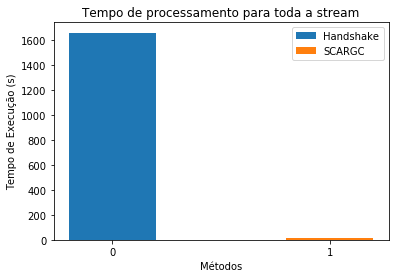

/home/localuser/Documentos/procopio/ccomp/Handshake-TCC/source/plots.py:150: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


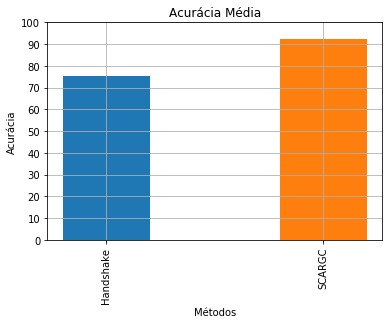

/home/localuser/Documentos/procopio/ccomp/Handshake-TCC/source/plots.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


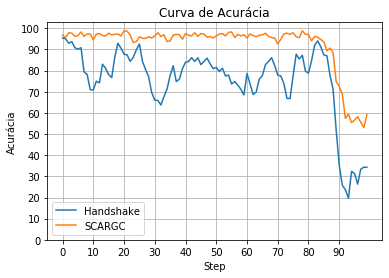

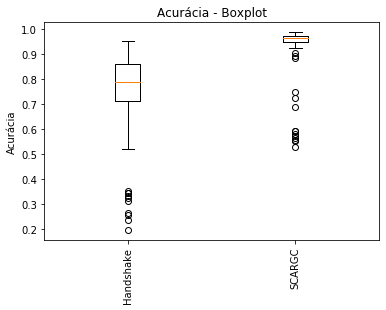

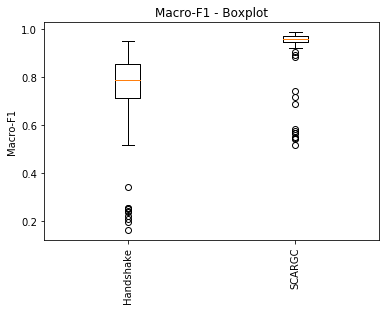

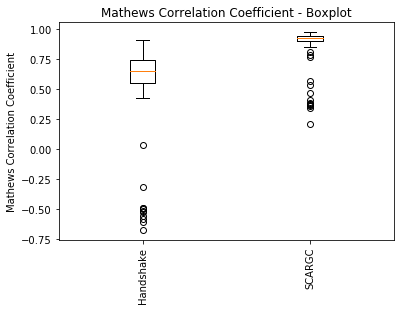

In [11]:
score = 0.7527479462013812


listTime = [tempo, tempoS]
listAcc = [score, scoreS]
listMethod = ['Handshake', 'SCARGC']
matrixAcc = [acc_percent, acc_percentScargc[0]]
matrixF1 = [f1_per, f1_S[0]]
matrixMcc = [mcc_per, mcc_S[0]]


plots.plotTime(listTime, listMethod)
plots.plotAverageAcc(listAcc, listMethod)
plots.plotAccuracyCurves(matrixAcc, listMethod, step)
plots.plotBoxplot('acc', matrixAcc, listMethod)
plots.plotBoxplot('f1', matrixF1, listMethod)
plots.plotBoxplot('mcc', matrixMcc, listMethod)

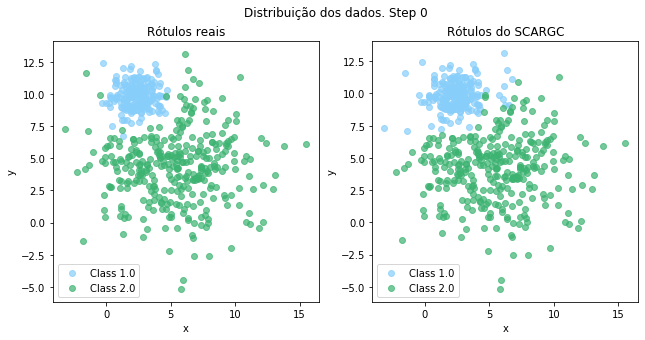

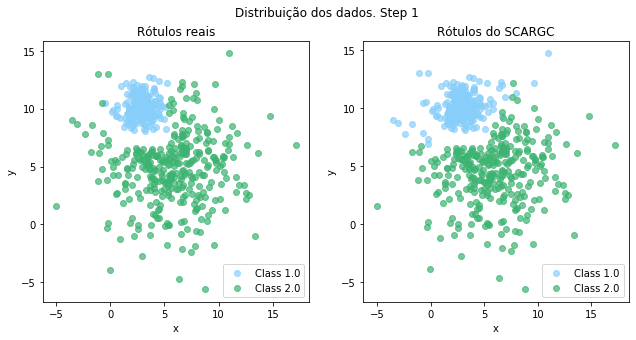

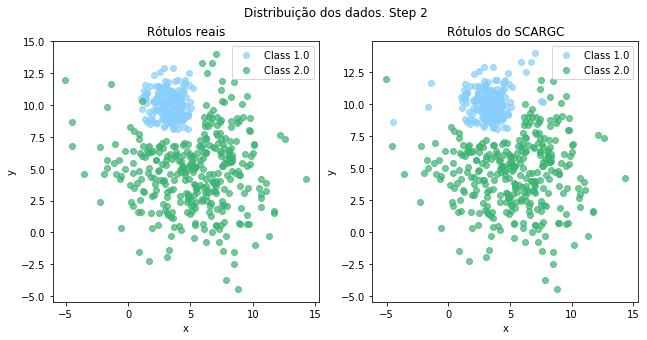

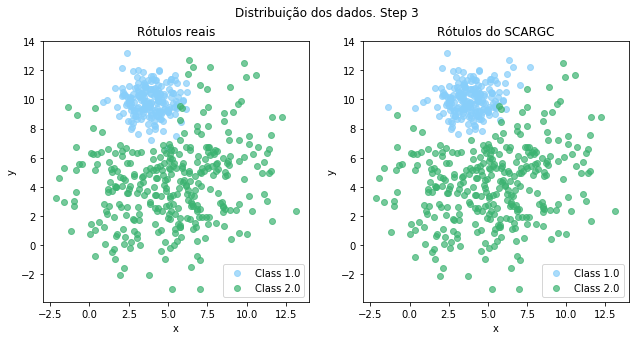

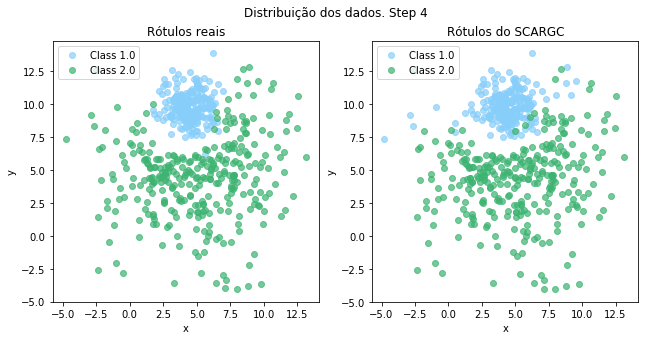

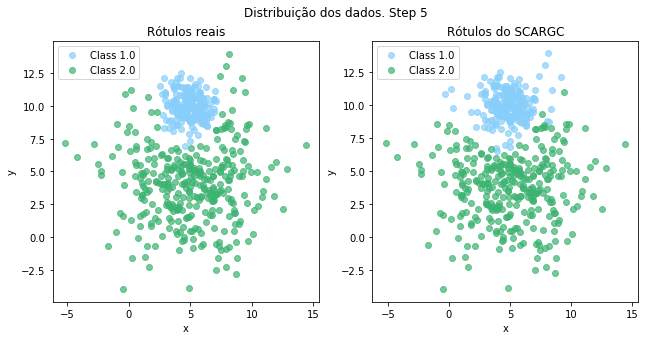

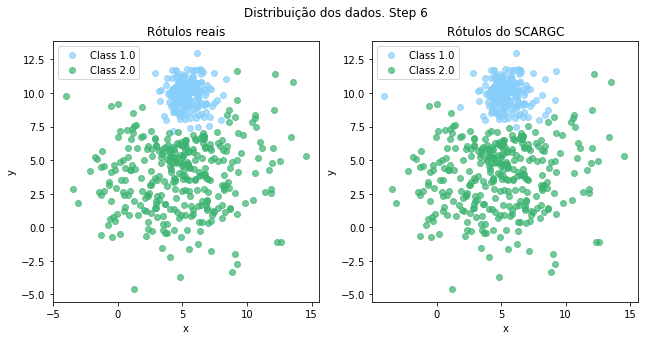

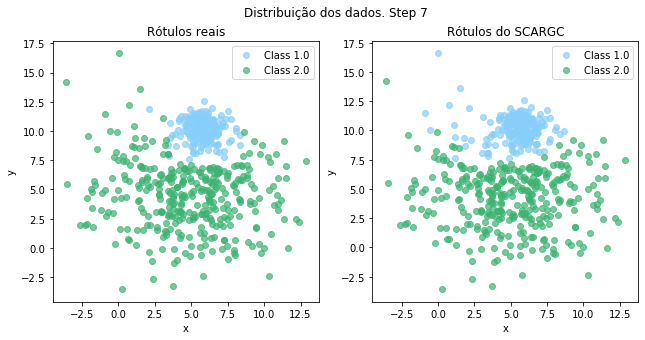

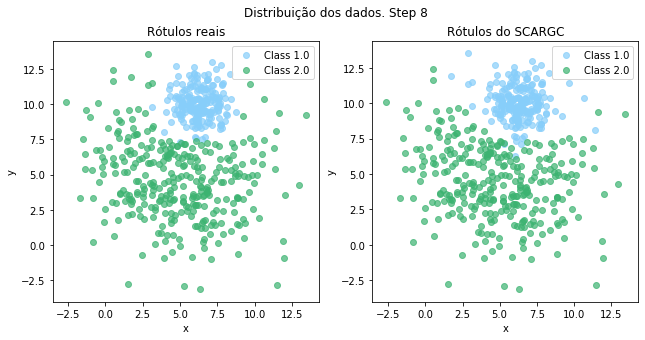

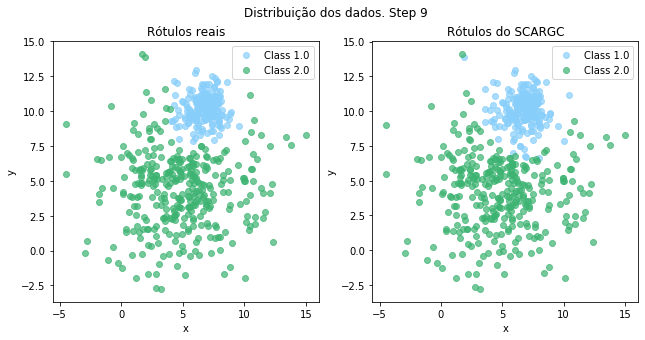

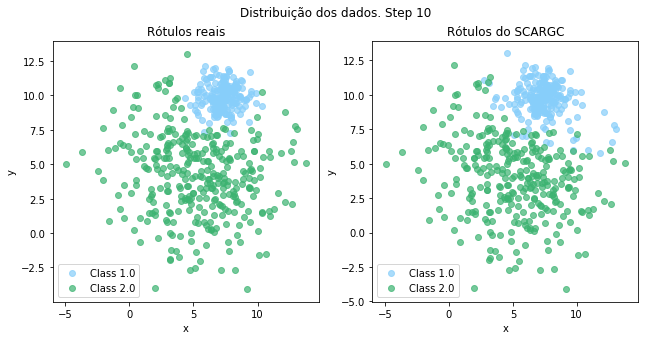

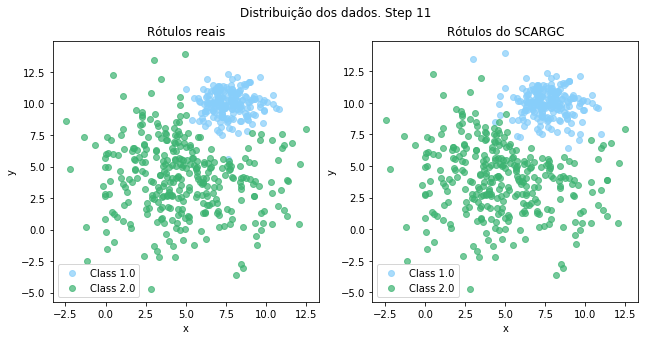

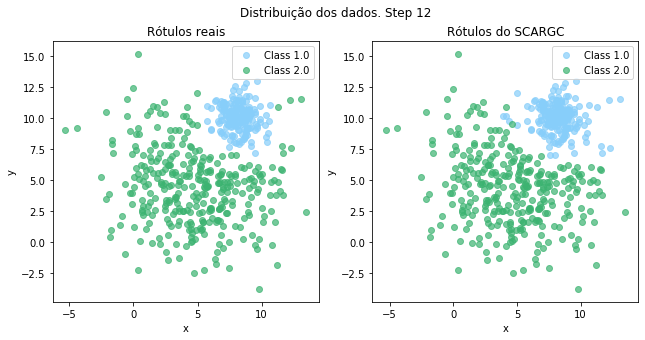

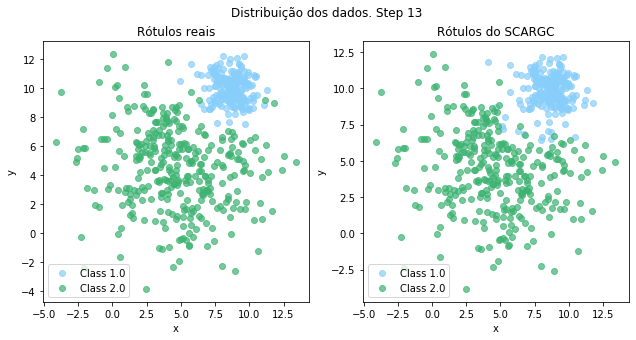

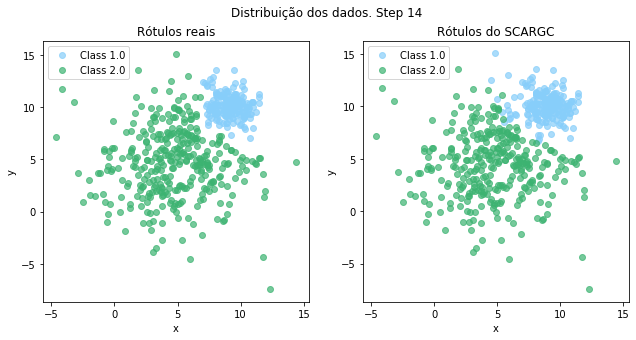

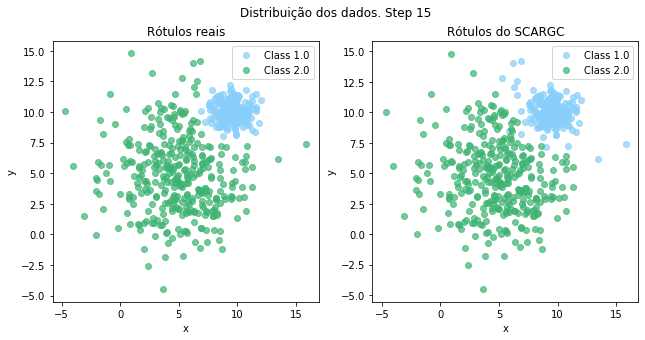

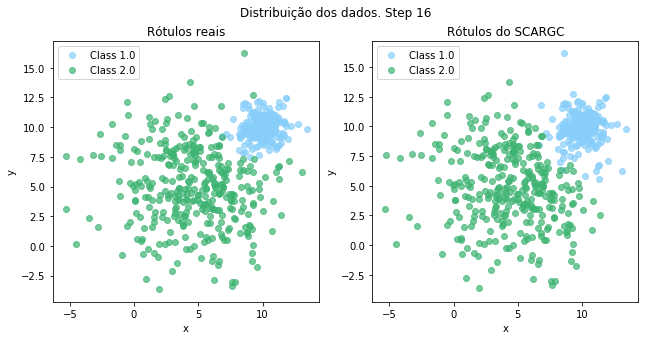

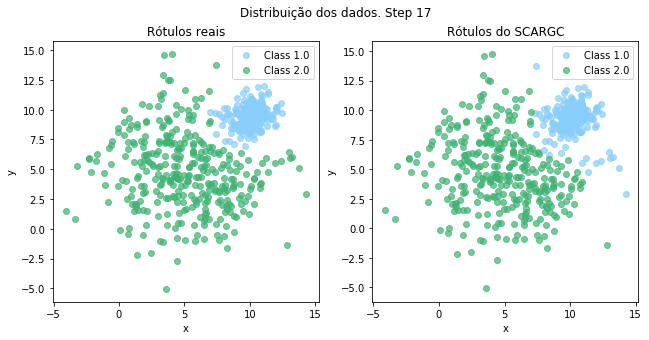

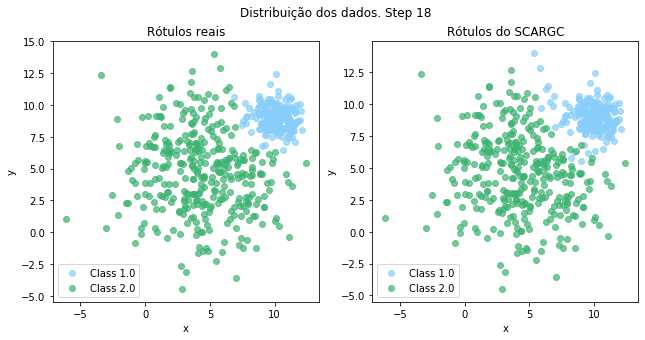

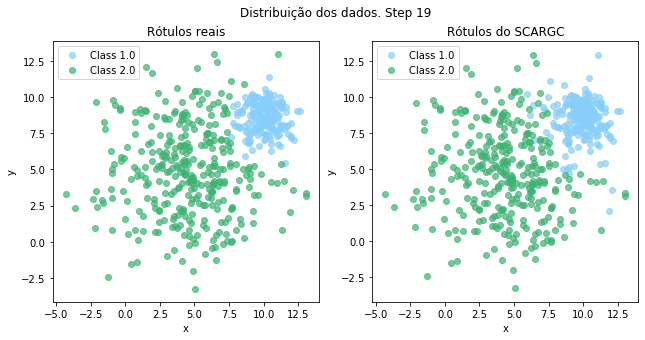

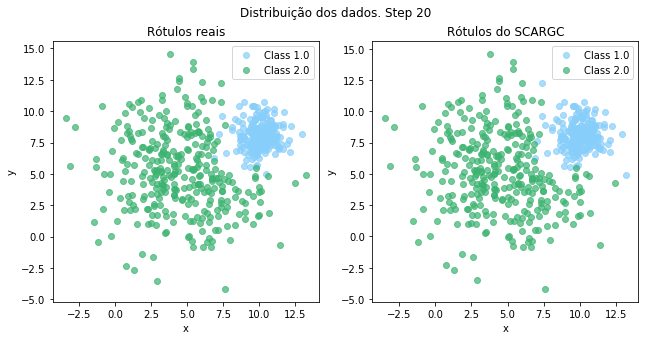

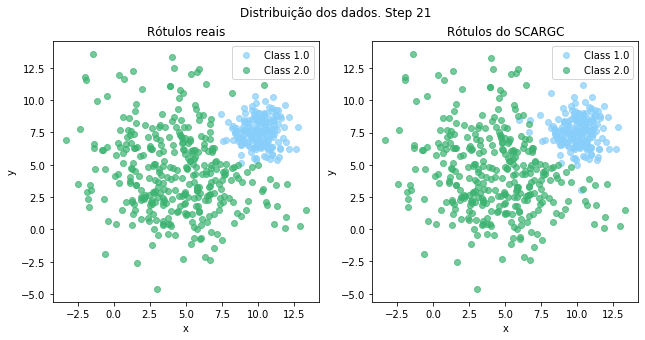

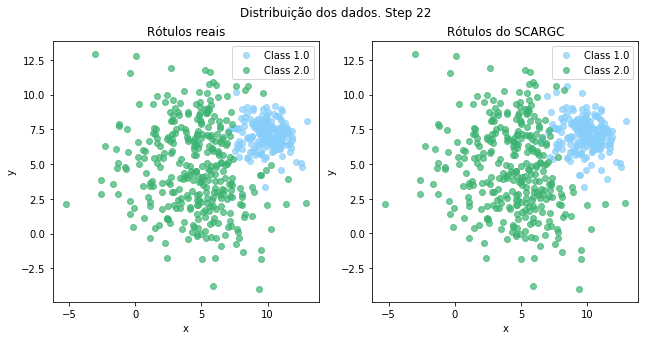

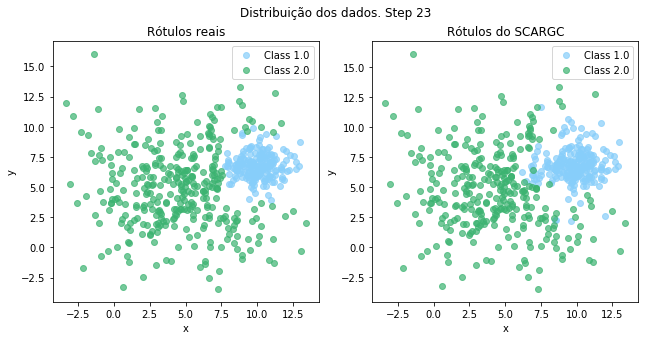

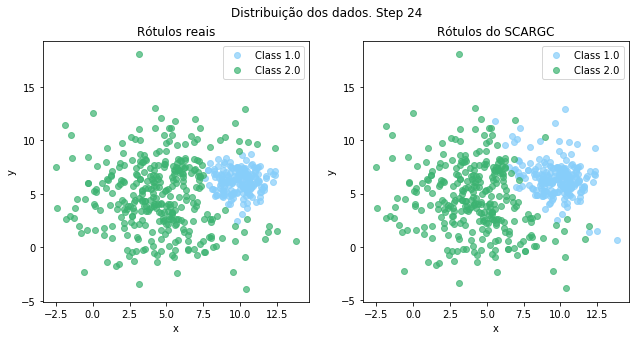

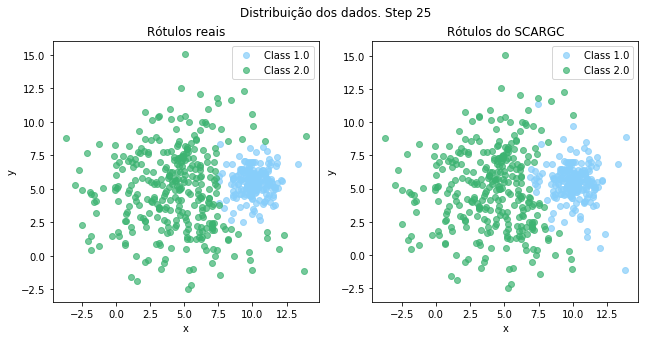

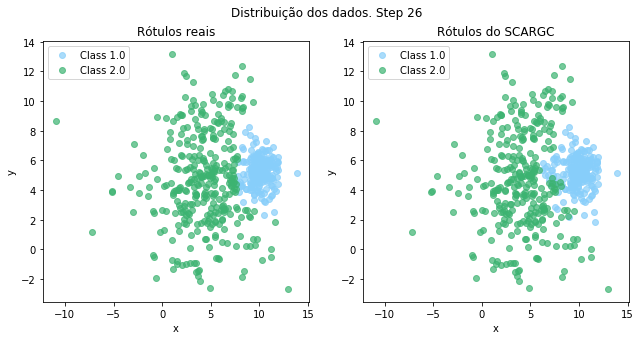

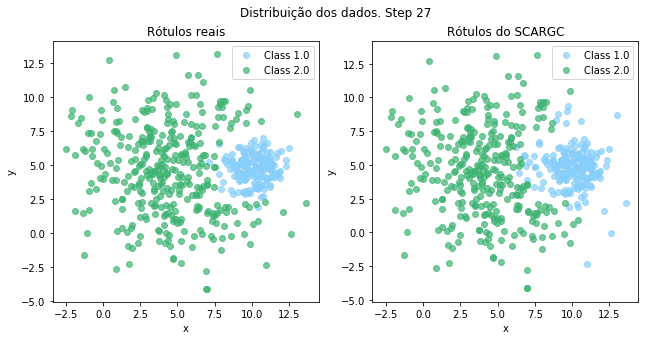

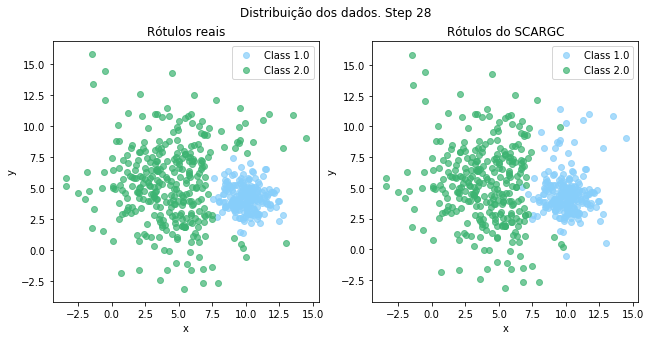

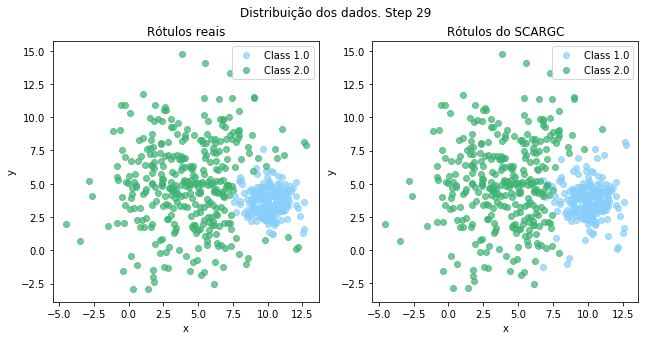

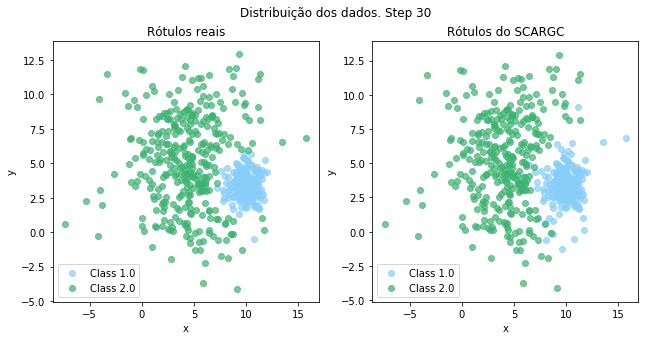

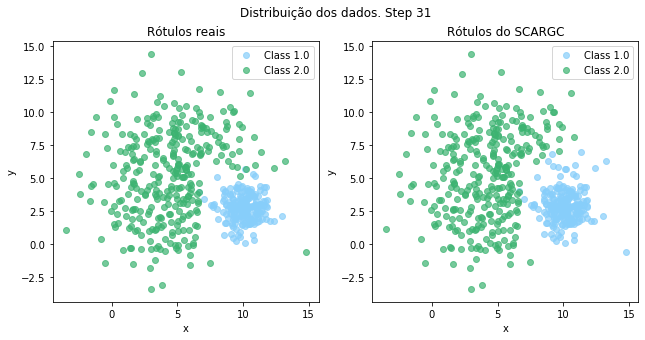

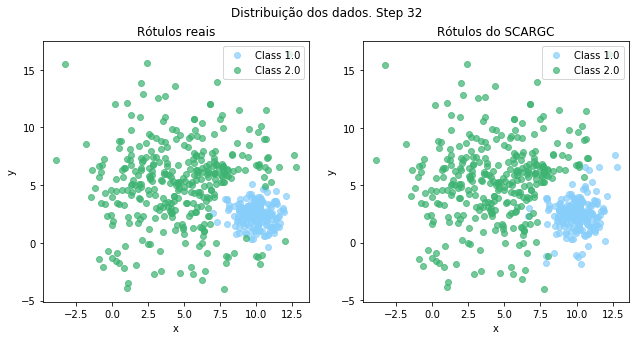

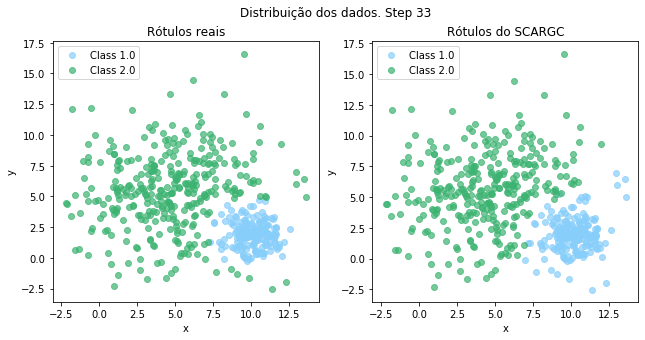

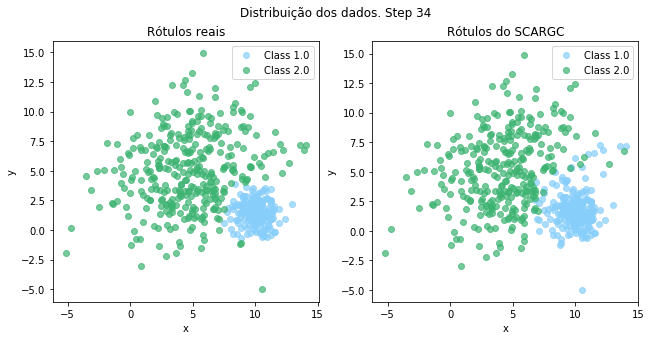

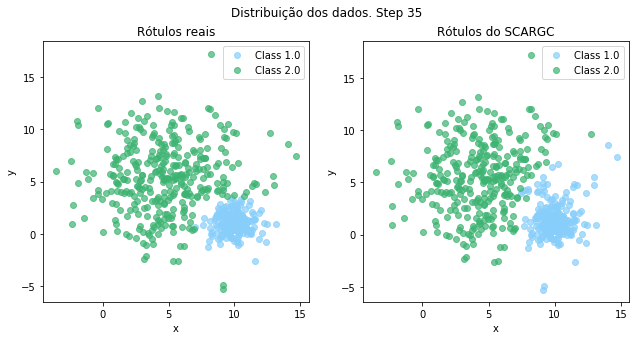

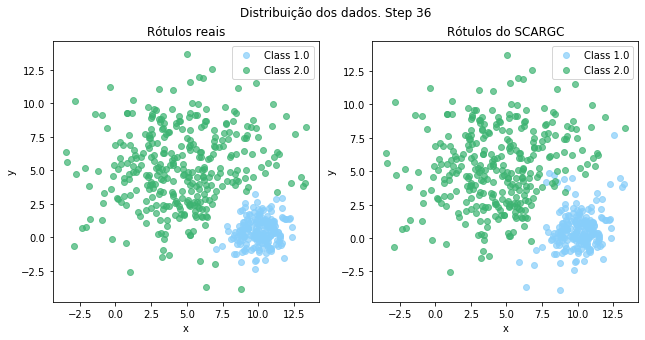

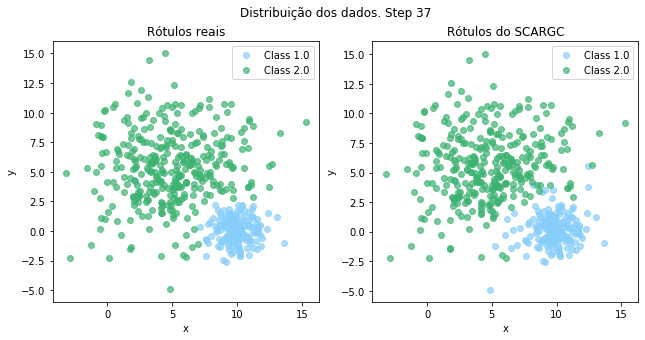

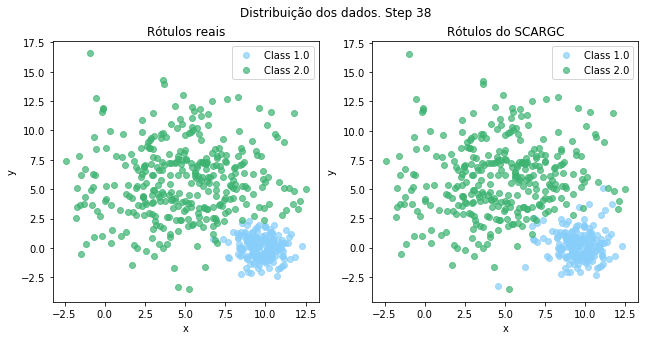

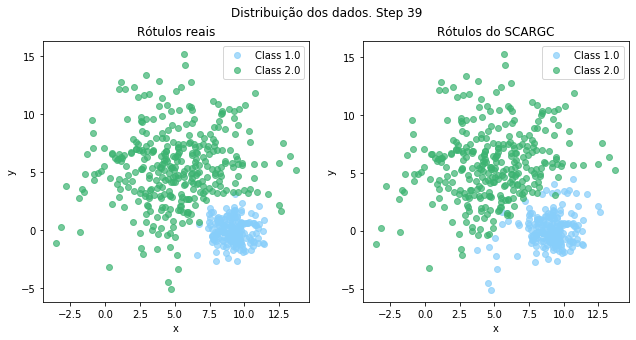

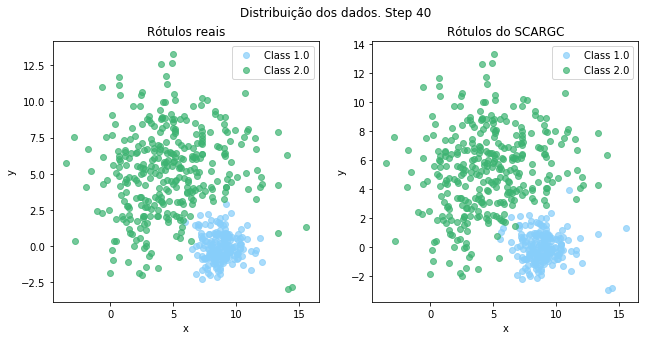

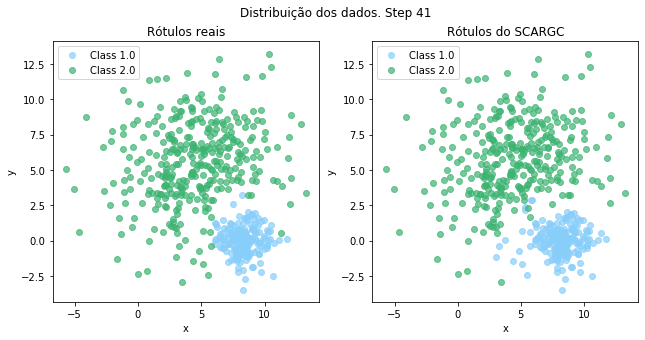

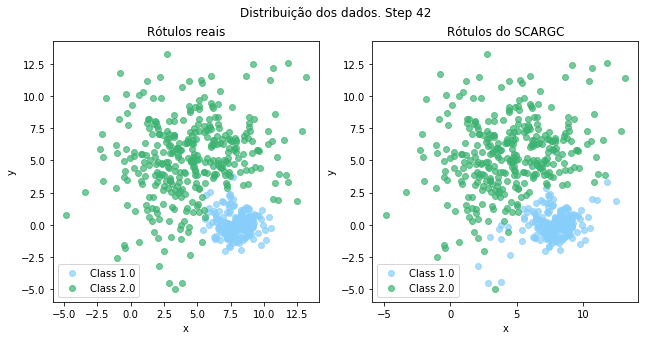

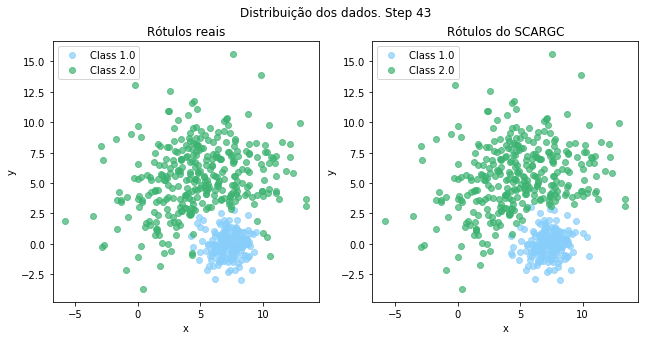

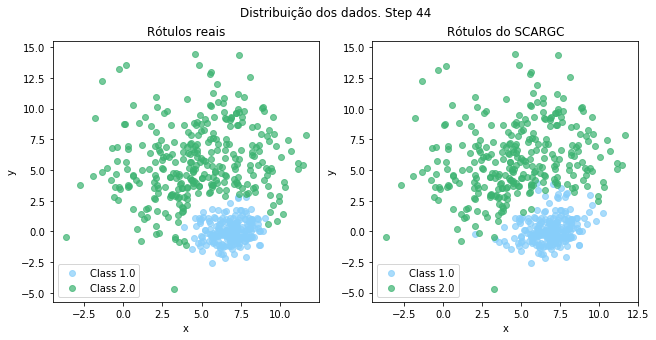

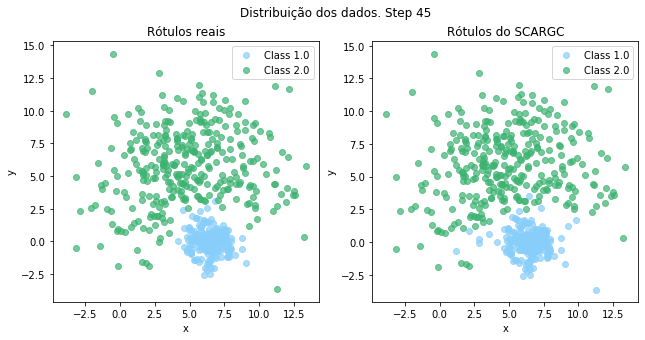

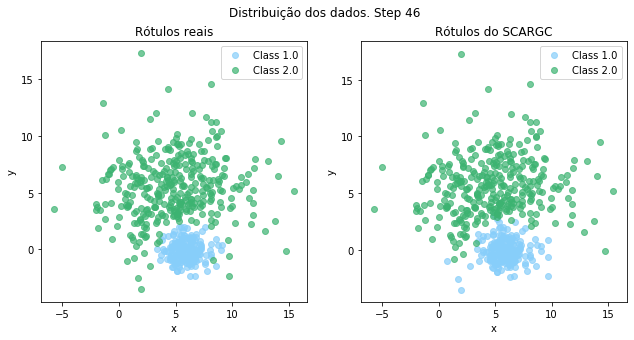

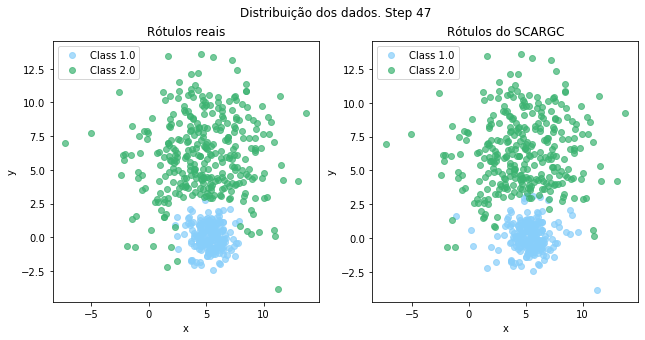

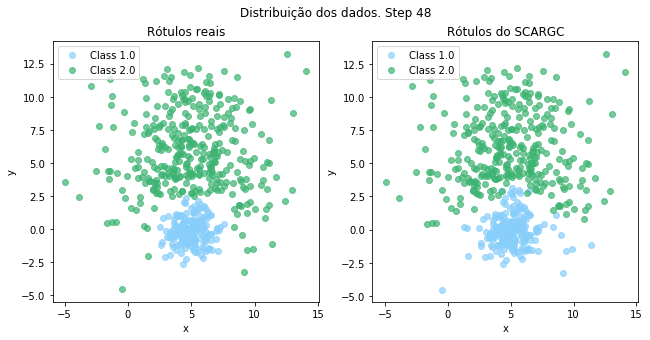

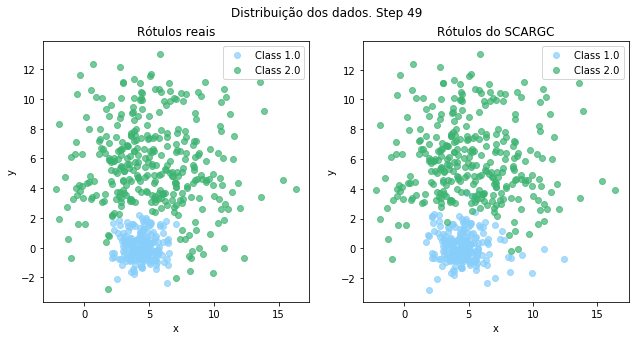

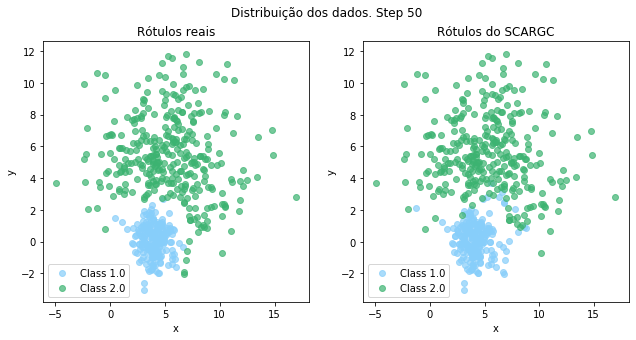

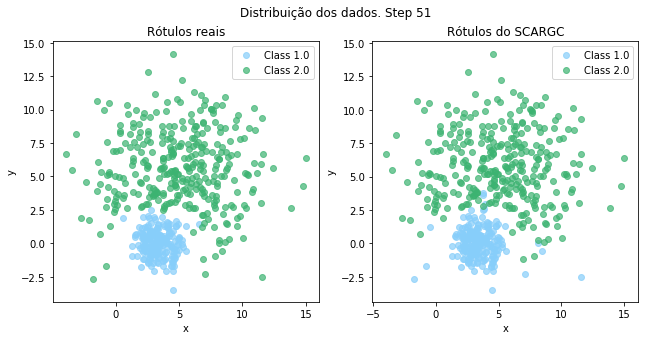

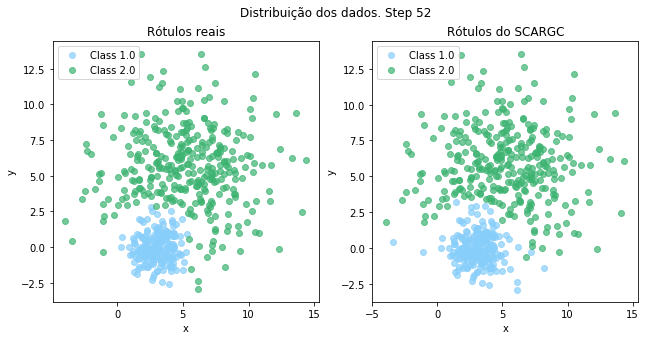

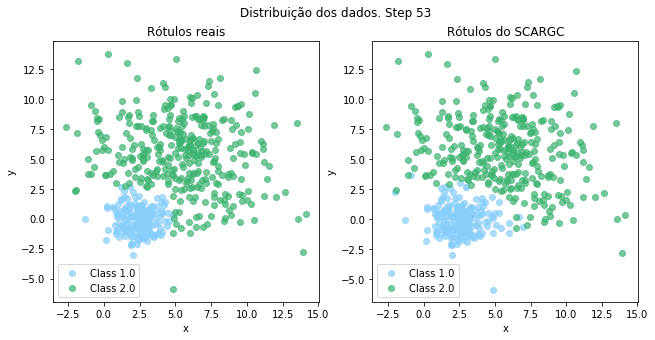

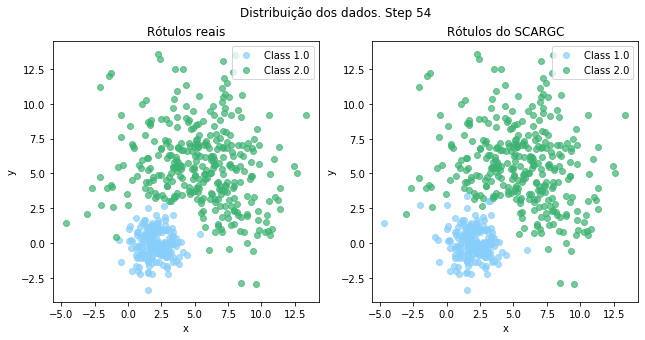

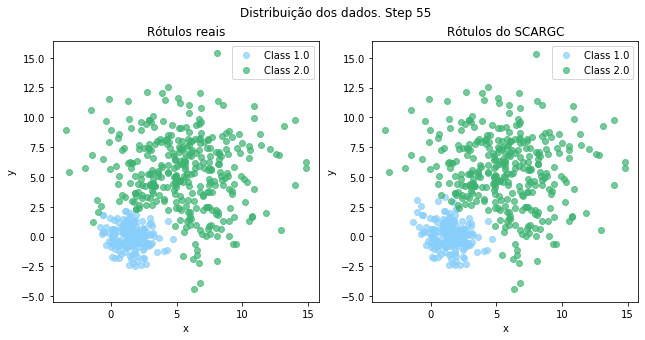

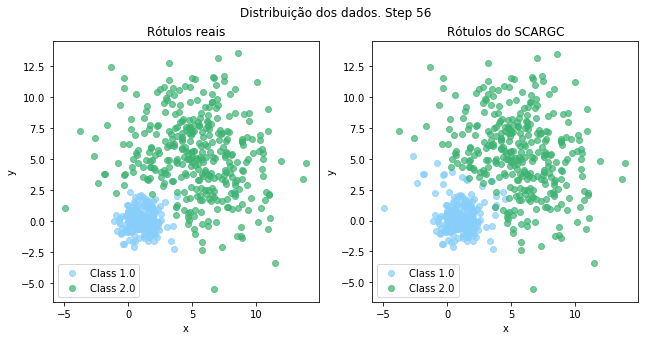

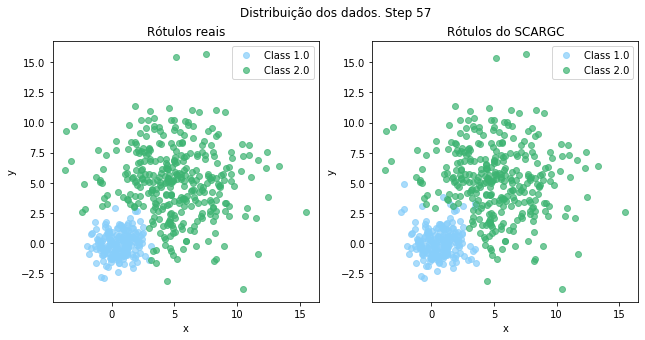

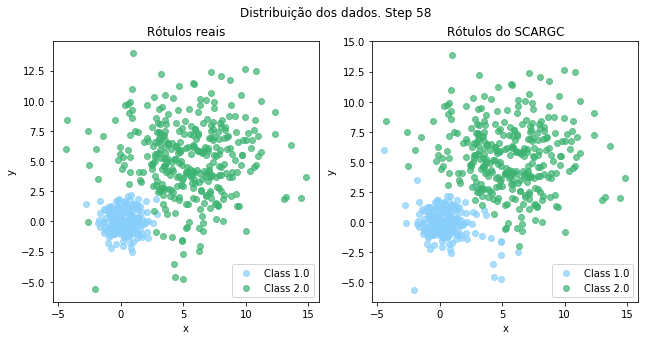

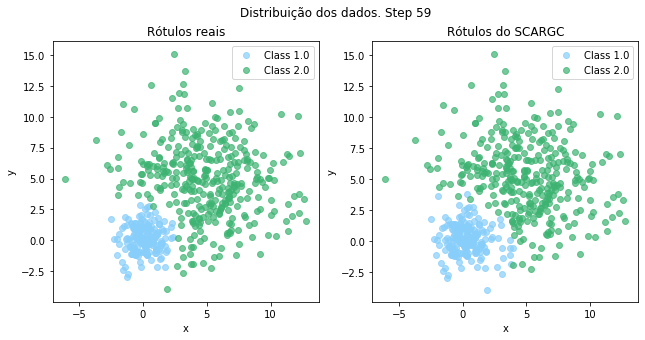

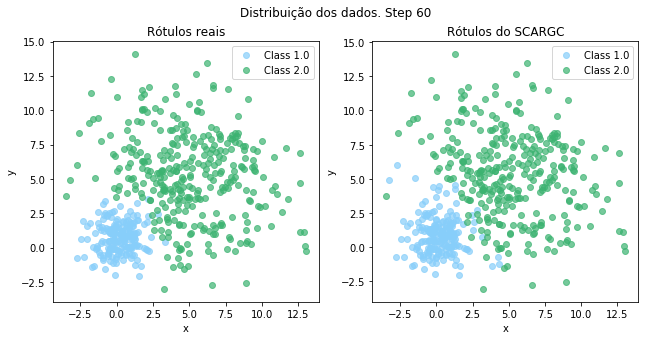

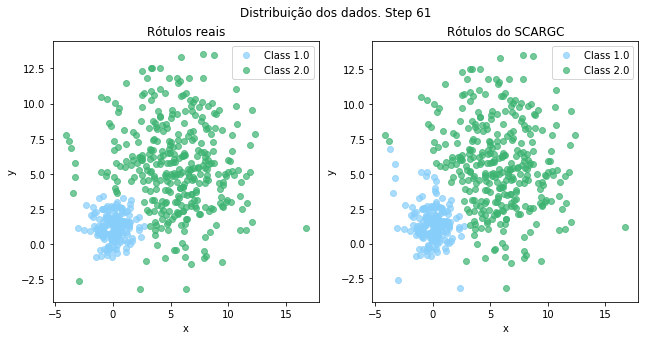

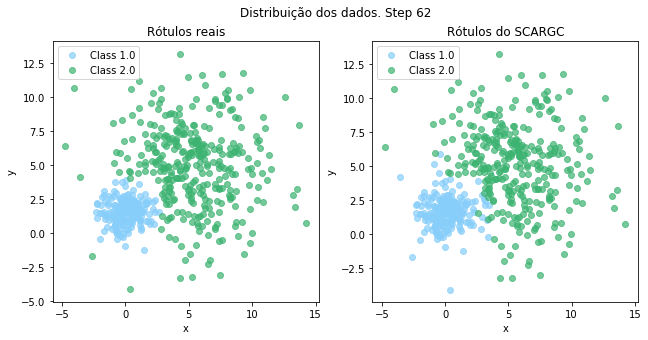

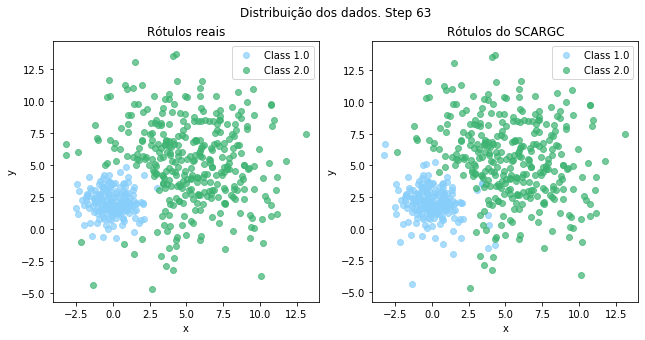

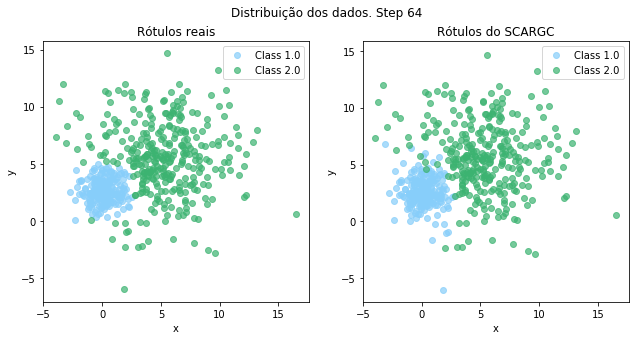

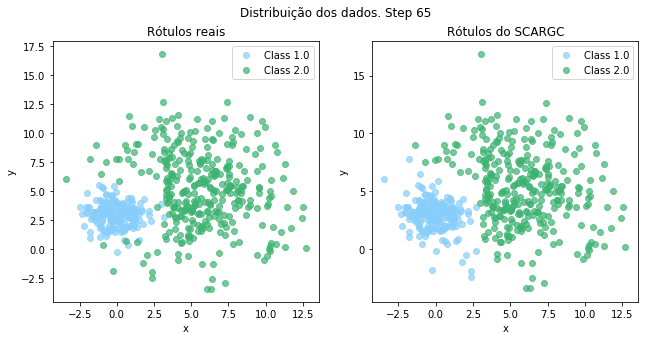

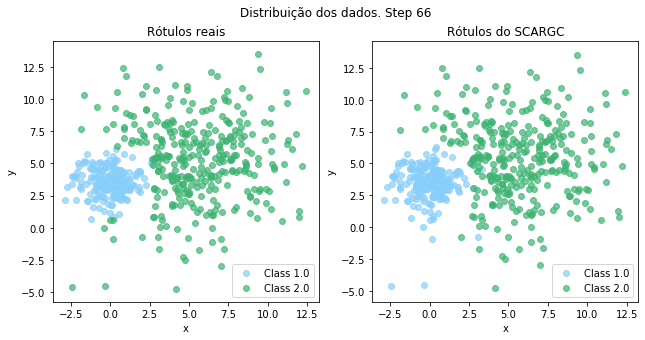

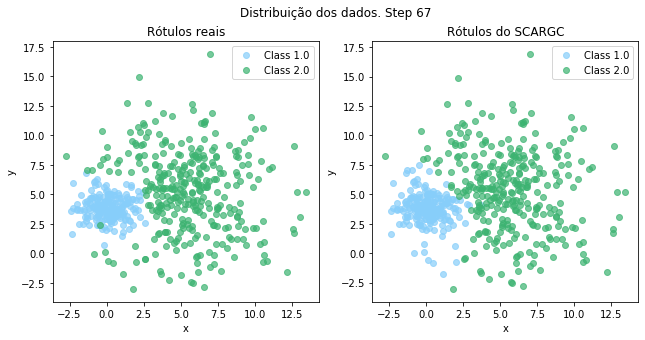

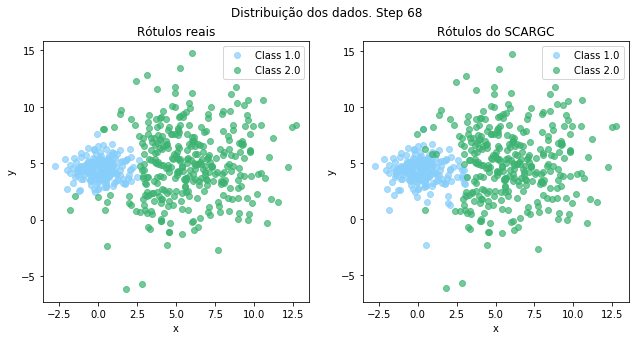

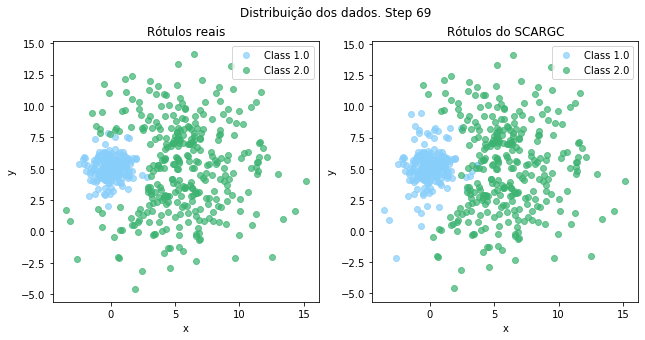

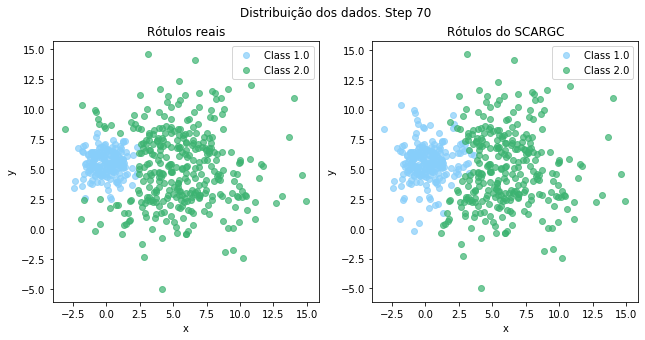

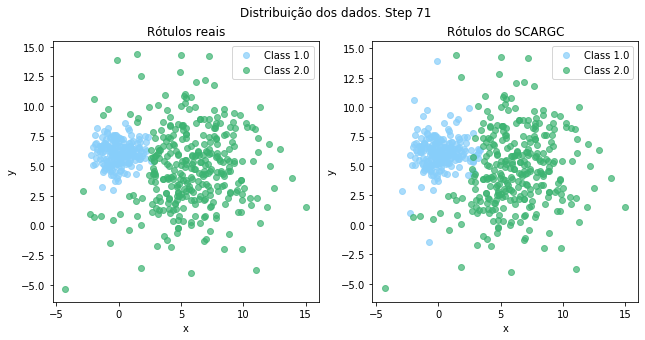

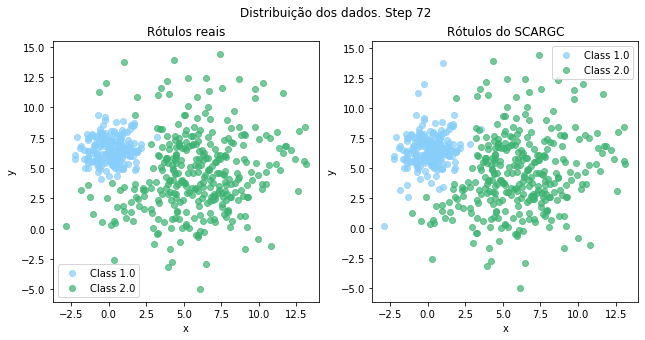

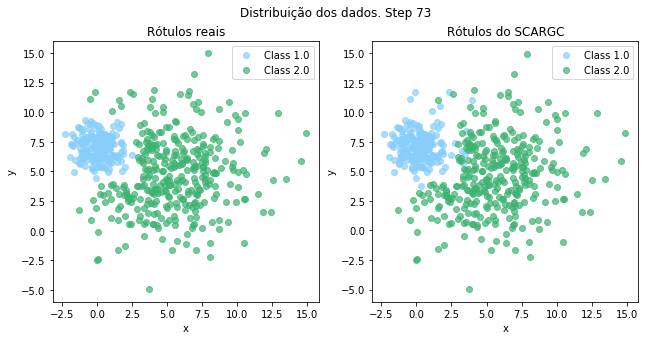

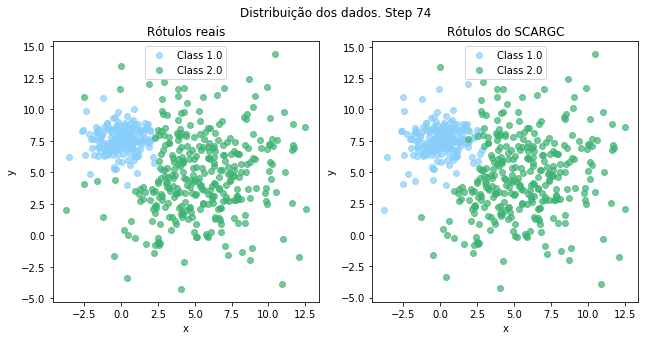

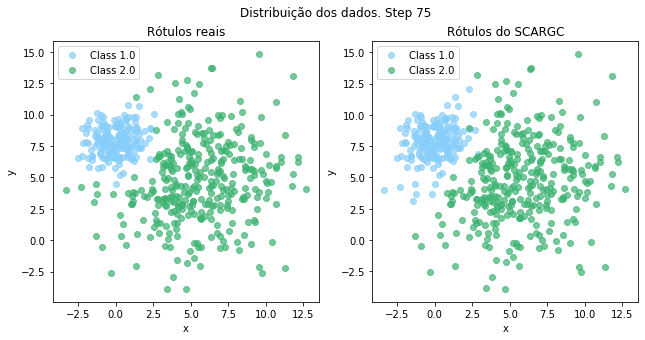

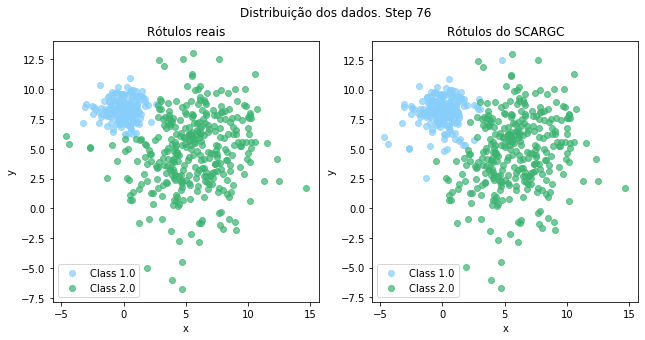

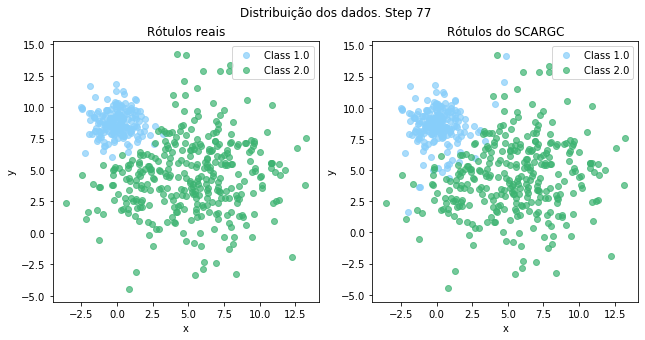

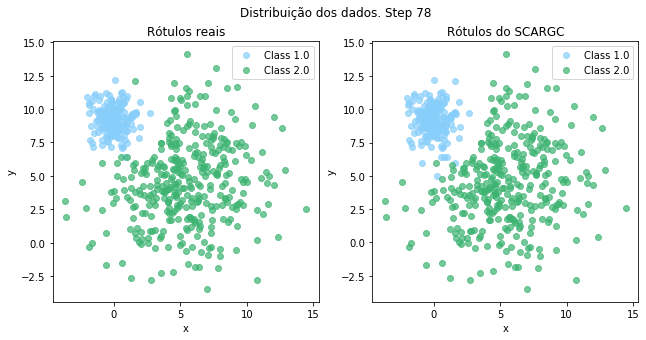

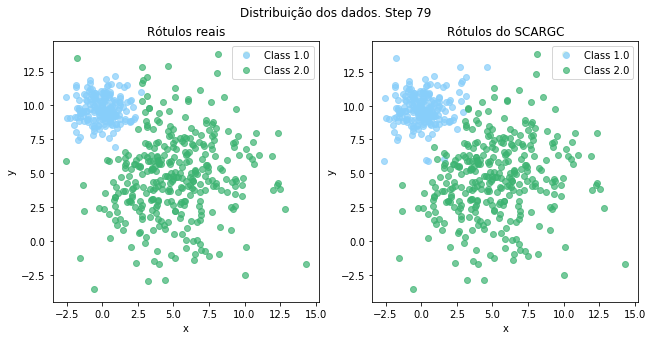

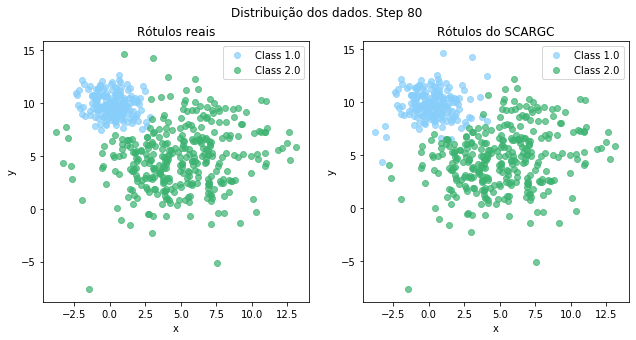

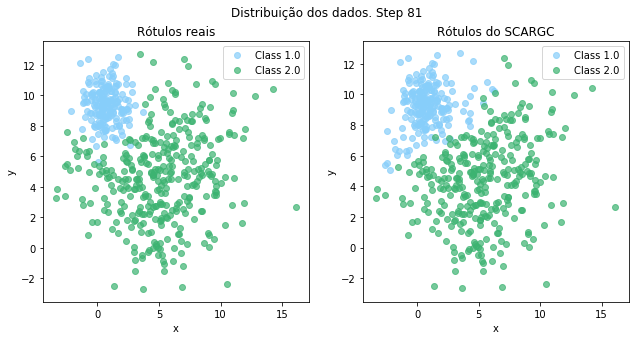

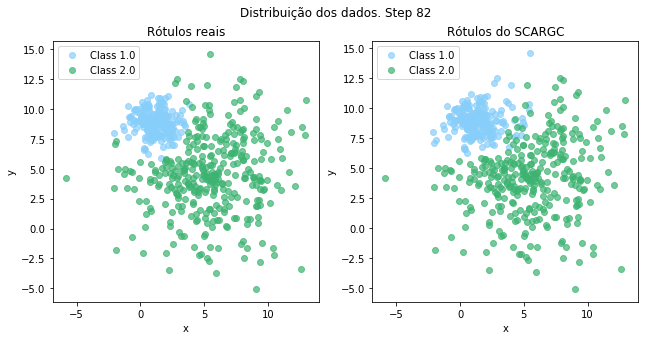

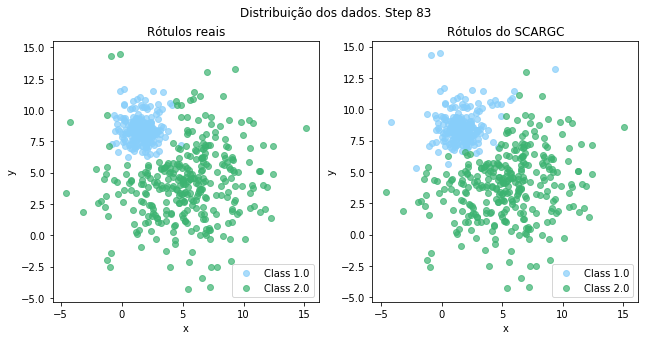

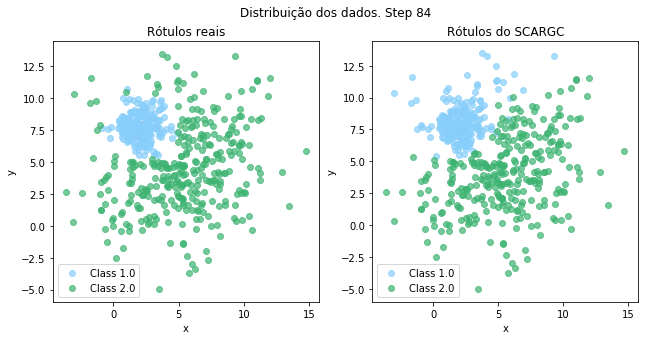

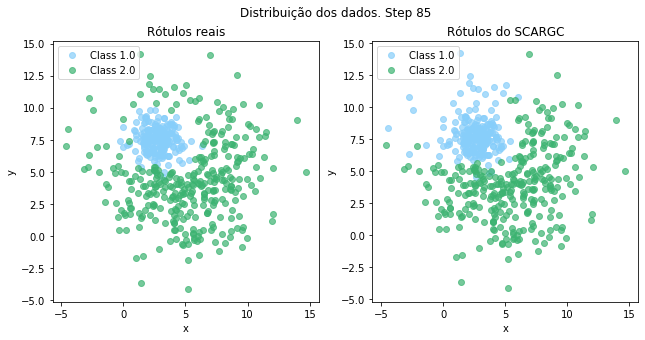

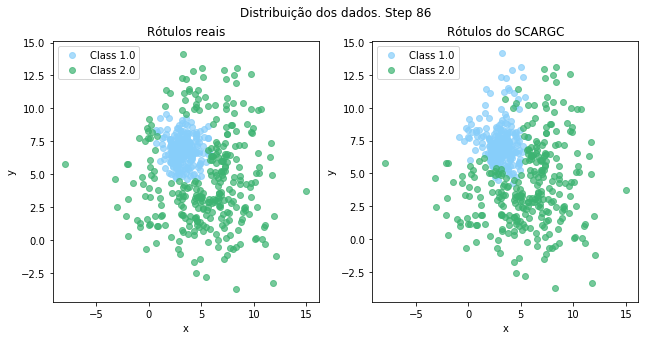

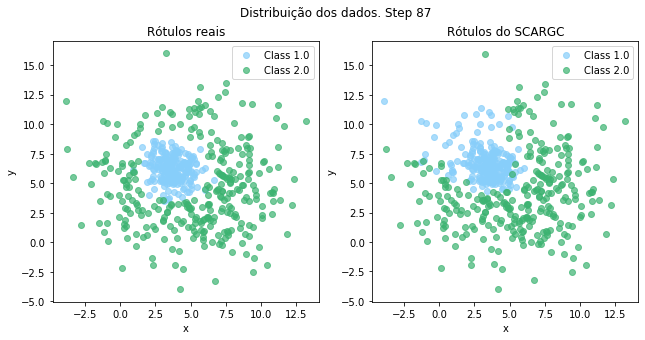

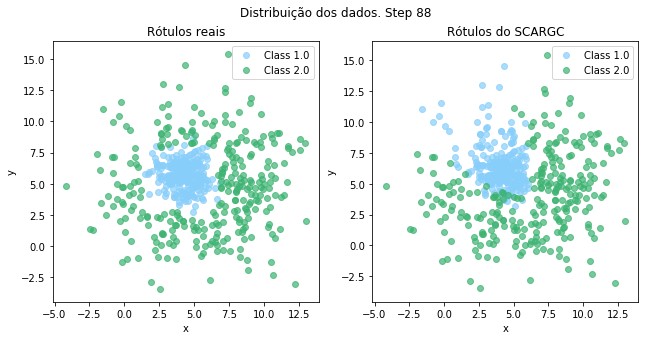

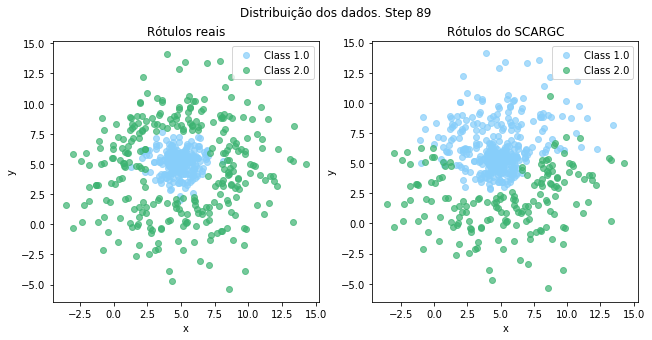

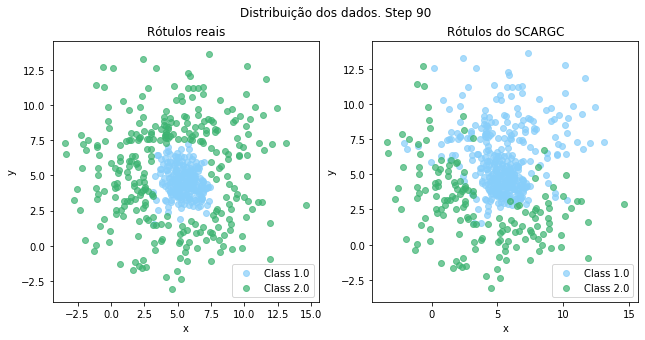

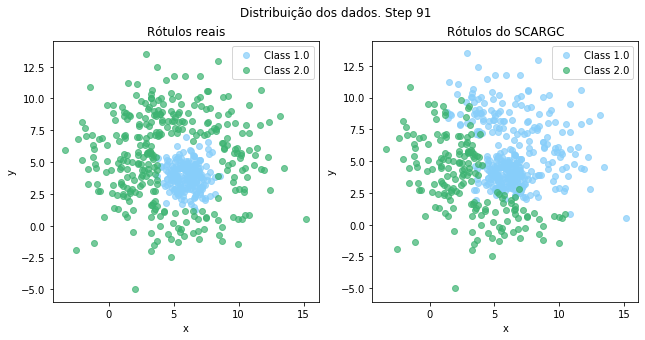

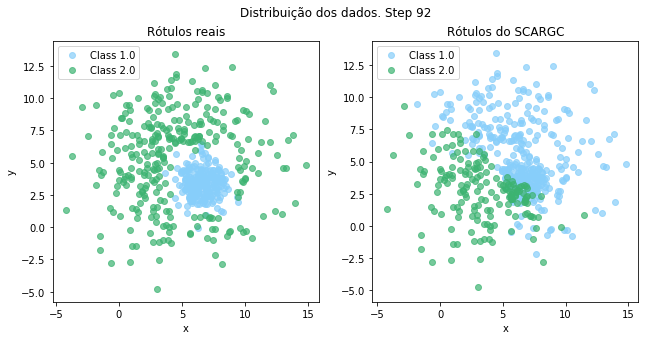

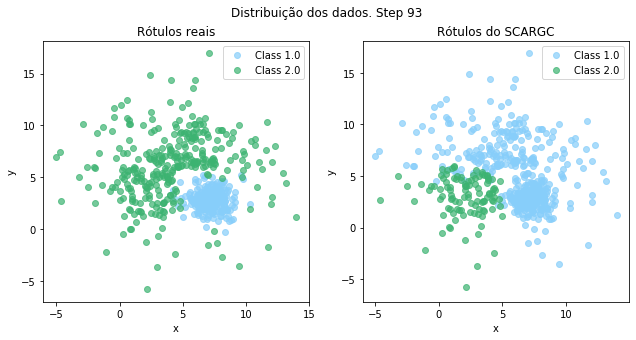

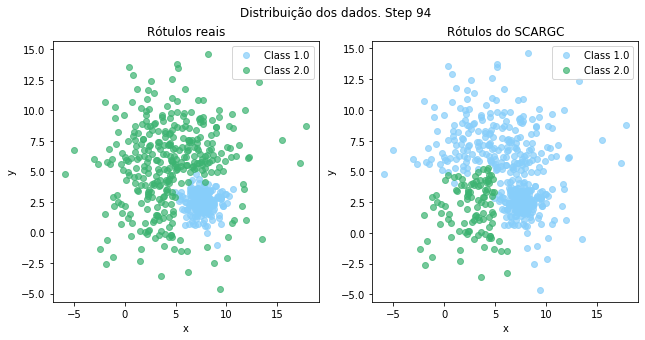

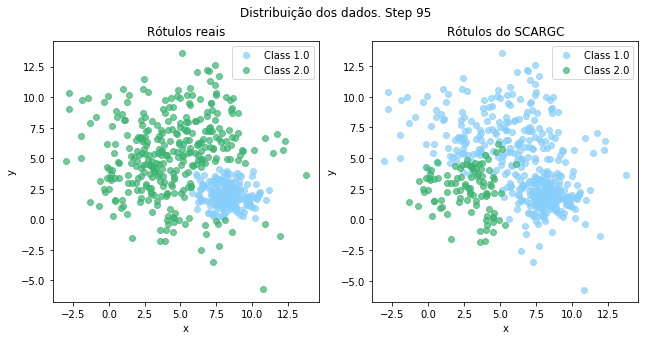

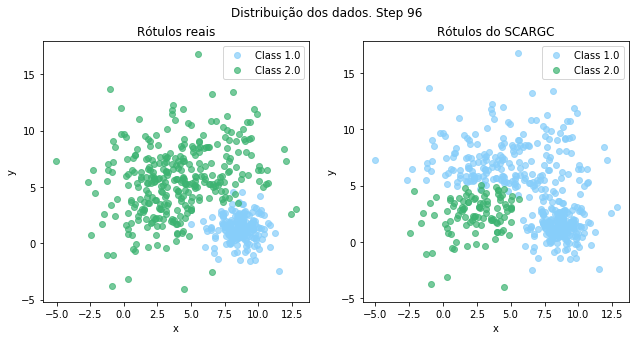

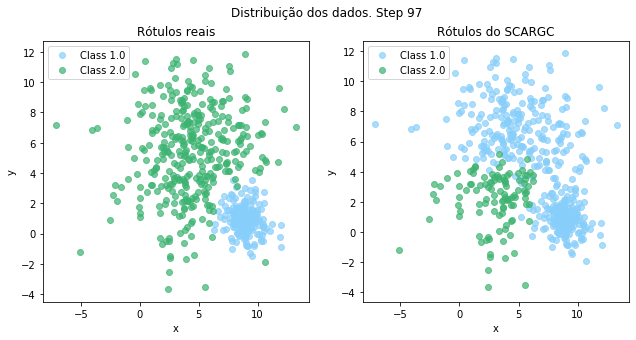

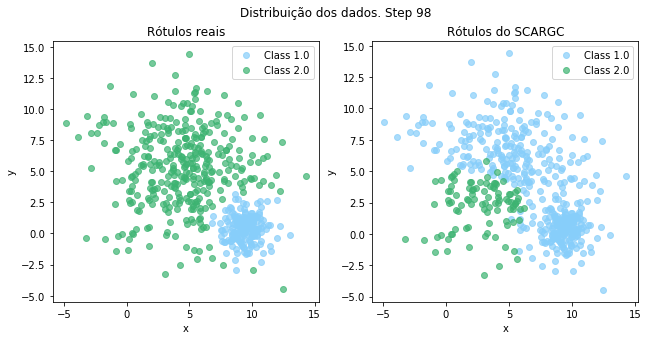

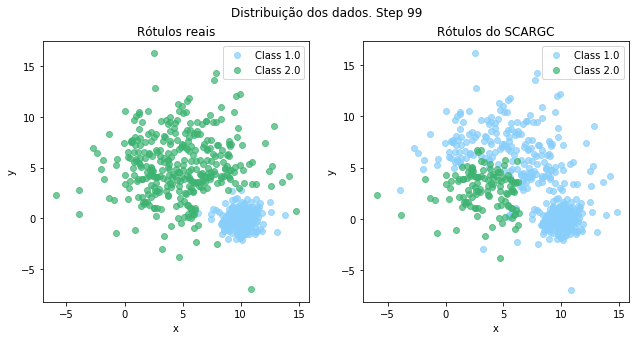

In [12]:
plots.plotPerBatches(stream, pred, l_stream, len(stream), step)